# <span style="color:royalblue"><center> PCA: Análisis de componentes principales </center></span>
Es un método de reducción de dimensionalidad.
### Prefacio
**¿Qué significa la proyección de un vector sobre otro vector?**
También se le llama coloquialmente la sombra de otro vector, es decir, la sombra del vector $a$ en el $b$. Es ortogonalmente la distancia que se logra al bajar hacia el vector $b$ el vector $a$
¿Para qué sirve en DS?
Resulta que cuando hay un conjunto con ciertos datos, con cada columna con distribuciones asociadas es decir que la varianza puede cambiar dependiendo de en qué dirección me muevo. 
Es el equivalente a poder entender si en un scatter plot $x vs y$ me muevo en dirección únicamente de $x$, únicamente en $y$ o si por el contrario en cualquier punto intermedio variando con una línea de más o menos pendiente entre ambos ejes. Hay ciertas direcciones donde se capturan mejor las varianzas de los datos que en otros, porque hace un mejor fit. 

Esto visualmente se podría entender ene l sentidod e cuando hay un vector que tiene una sombra muy pequeña sobre los datos indicaría que simplemente esa no es la mejor dirección para capturar lo que está representado en el scatter. En tanto que a mayor sombra, mayor cubrimiento de la varianza d elos datos. 

|X|Y|V*(X,Y)|
|--|--|-----|
|..|..|.....|

Tengo las coordenadas de cada punto en el scatter en $(X,Y)$, lo que me queda por sacar es la proyección del vector $V$ en cada punto para ver la sombra.
Acá entonces, si se calcula la cov COVARIANZA de las proyecciones, según una dirección de movimiento, puede incrementar la cobertura. 
$var (V * X_1,...,V* X_n)$ = V ^ T * $\sum_{i=1}^{n} V$
La varianza en cierta dirección es coger la matriz de COV * por el vector de esa dirección pro medio de esa matriz y ese producto que representa esas tres matrices. 

### Cálculo de los valores propios
¿Qué sucede si cogemos la amtriz de COV y se descompone en sus vecotres y valores propios?

<img src = "varcov.png"></img>
La diagonal es 1 perfecto y en cada colúmna hay datos propios.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

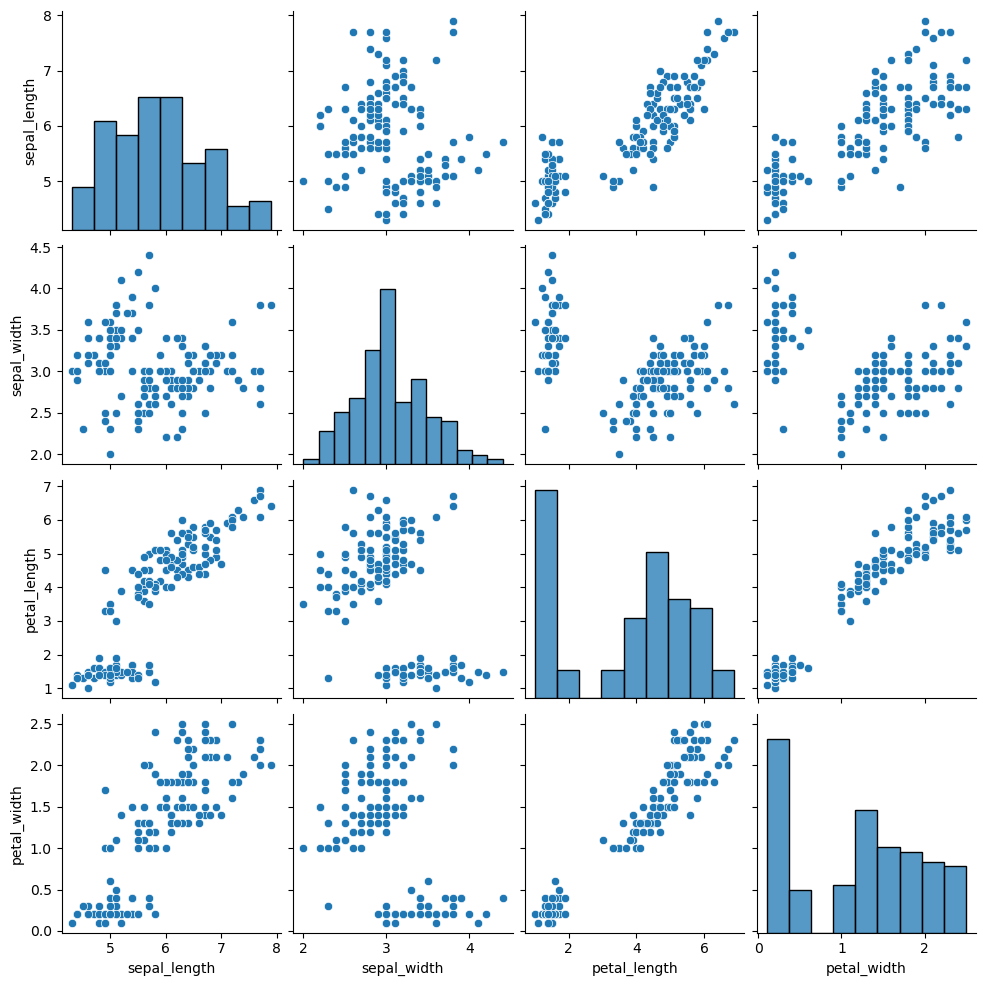

In [2]:
sns.pairplot(iris)

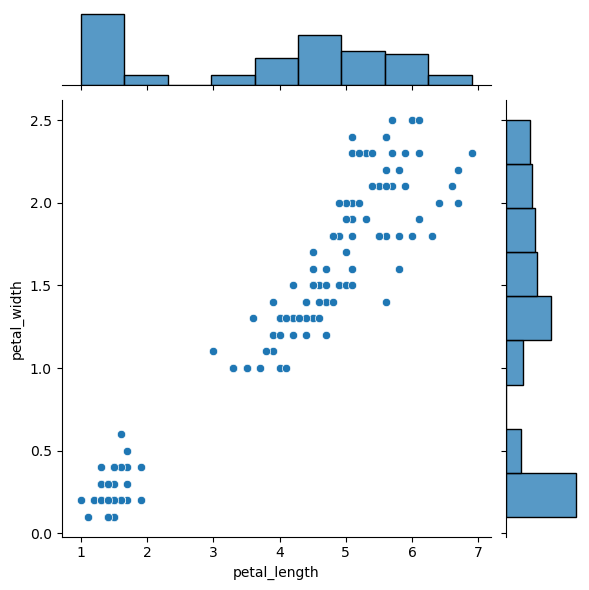

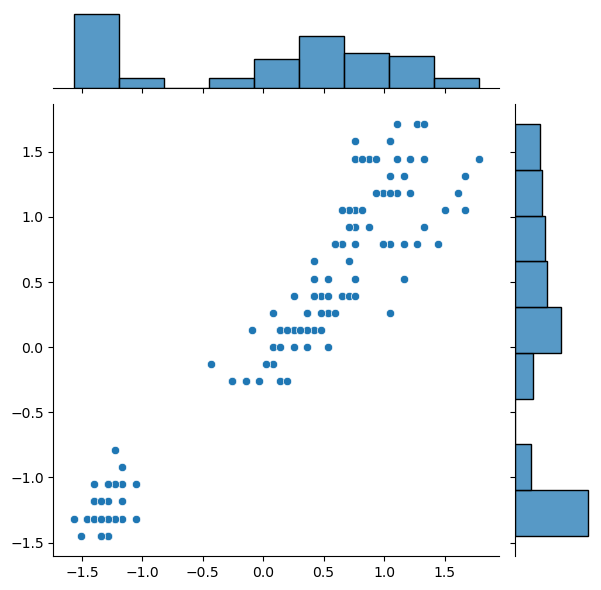

In [3]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [4]:
"""
linald.eig: calcula en la descomposición de vectores una matriz, en este caso
la de covarianza. eigen es alemán para propios.
"""
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [5]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [6]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [7]:
"""
La lista de a continuación lo que está pretendiendo buscar es mostrar la 
varianza que ellos explican. Acá lo único que se busca es porcentualmente
ver cuál vector calcula mejor los valores.
"""
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [10]:
reduced_scaled = pca.transform(scaled)
#reduced_scaled

In [11]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

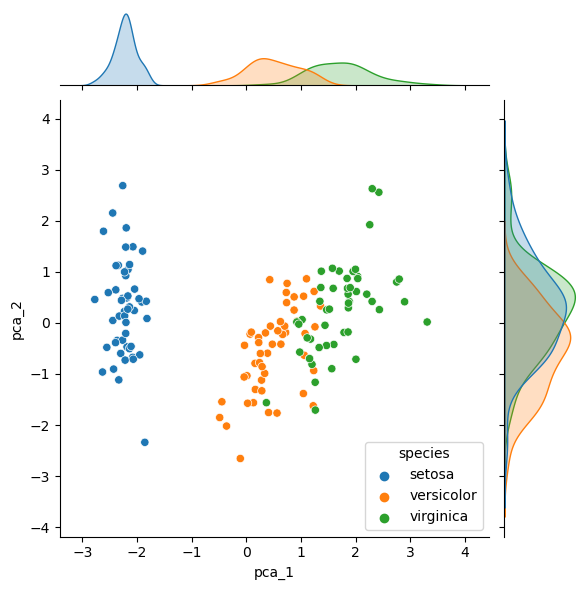

In [12]:
iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] = reduced_scaled[:,1]
sns.jointplot(x = iris['pca_1'], y = iris['pca_2'],hue=iris['species'])

In [18]:
min = iris['sepal_length'].min()
max = iris['sepal_length'].max()
max-min

3.6000000000000005